<p style='text-align: center'><a href=https://www.biozentrum.uni-wuerzburg.de/cctb/research/supramolecular-and-cellular-simulations/>Supramolecular and Cellular Simulations</a> (Prof. Fischer)<br>Center for Computational and Theoretical Biology - CCTB<br>Faculty of Biology, University of Würzburg</p>

<p style='text-align: center'><br><br>We are looking forward to your comments and suggestions. Please send them to: <br><br></p>
    
 <p style='text-align: center'>   <a href=andreas.kuhn@uni.wuerzburg.de>andreas.kuhn@uni.wuerzburg.de</a> or <a href=sabine.fischer@uni.wuerzburg.de>sabine.fischer@uni.wuerzburg.de</a></p>

<h1><p style='text-align: center'> Introduction to Julia </p></h1>


# Data analysis

Data is typically analyzed in either arrays or DataFrames.

Arrays are often used when the data is not high-dimensional and high performance is important e.g. because the amount of data is large. A good example for such data would be a time series of 2D/3D positions of e.g. cells, particles ,... . Such data is not very complex by itself as it is "only" coordinates over time,  but can be huge in size. 

`Julia` has a very powerful array implementation. As you have already learned the necessary basics of arrays in the data structure chapter, we will not focus too much on arrays here.

More complex high-dimensional data is typically represented in the form of tables called `DataFrames`. `R` and `Python` both have powerful package collections, called `tidyverse` and `pandas/scipy` respectively, for working with `DataFrames`.  

`Julia` is also well-equipped for working with `DataFrames`. The packages `DataFrames` and `Statistics` provide similar functionality as the mentioned packages of `R` and `Python`. The package `CSV` is used for importing/exporting tabular data, the packages `Chain` and `DataFramesMeta` for a more convenient syntax, the `Dates` package for dealing with dates and of course `CairoMakie` for plotting.



Comment: Julia has a different approach than R or Python when it comes to package functionality.  Python or R packages like `numpy`, `pandas` or the `tidyverse` are so huge and introduce so many new features that you could argue that they are not really packages but new languages inside a language. For Python, this is especially true as numpy and pandas are internally written in C and the Python code between numpy/panda functions acts more like an interface/glue than doing actual computations. The advantage of this approach is, that in many cases you just need to import one package, and it just works.

Julia's packages are much smaller and often only serve one specific purpose. Therefore, you almost always have to import a number of packages to get all the functionality you need. But, as the packages themselves are written in Julia, it is quite easy to share functions between packages or to extend/modify them with self-written, equally fast functions.

In [2]:
using DataFrames, Statistics
using CSV,Chain, DataFramesMeta, Dates
using CairoMakie

### 1. Data set

In this notebook, we are going to analyse the weather of our beautiful home town Würzburg from 1948 until 2021. The data we are using (and much more) is freely available on the website of the [Deutscher Wetterdienst](https://cdc.dwd.de/portal/).

The first step is to import the data in the file dc.csv as a `DataFrame` using the `CSV` and `DataFrame` package. The keyword argument `normalizenames` is used to cast all column names to valid Julia identifiers without spaces. So that the syntax `data.columnname` always works to access single columns.  

In [5]:
data = DataFrame(CSV.File("dc.csv",normalizenames = true))

Row,Zeit,Temperatur_Min,Temperatur_Max,Temperatur,Luftfeuchtigkeit,Niederschlag,Niederschlagsart,Bedeckung,Sonnenscheindauer,Datum,Kategorie
,String31,Float64,Float64,Float64,Float64,Float64,String7?,Float64,Int64,String15,String31
1,1947-12-31T23:00Z,-2.6,2.9,0.27,88.91,0.0,missing,NaN,0,1948/01/01,Overcast
2,1948-01-01T23:00Z,2.8,10.0,6.46,91.46,0.0,missing,NaN,0,1948/01/02,Overcast
3,1948-01-02T23:00Z,10.7,12.4,11.7,89.08,0.0,missing,NaN,0,1948/01/03,Overcast
4,1948-01-03T23:00Z,5.5,11.7,9.81,78.96,0.0,missing,NaN,0,1948/01/04,Overcast
5,1948-01-04T23:00Z,4.7,11.8,7.88,80.33,0.0,missing,NaN,0,1948/01/05,Overcast
6,1948-01-05T23:00Z,1.6,5.4,3.23,76.08,0.0,missing,NaN,0,1948/01/06,Overcast
7,1948-01-06T23:00Z,1.8,10.4,6.75,90.33,0.0,missing,NaN,0,1948/01/07,Overcast
8,1948-01-07T23:00Z,3.5,9.6,5.76,73.0,0.0,missing,NaN,0,1948/01/08,Overcast
9,1948-01-08T23:00Z,1.9,5.6,3.43,73.75,0.0,missing,NaN,0,1948/01/09,Overcast


Note: If not all columns are displayed, you can change the number of vertically displayed characters in a jupyter notebook by the command: `ENV["COLUMNS"] = 250`. The default value is 100, but can be increased to a number that fits well to your screen. 

### Comment: 
Observing the DataFrame presented above, it's evident that this data set is messy. Incorrect type detection, numerous missing values, incomplete records for the year 2022, German column names... To effectively engage with this data, necessary trimming and adjustments are imperative. This procedure, known as data cleaning, can be quite challenging but is an indispensable aspect of working with real world data. Consequently, this course will not bypass this crucial step; instead, it will equip you with essential techniques to navigate this process.

In [6]:
ENV["COLUMNS"] = 350;

### 2. Chained operations

Chained operations on the same data set are quite common in data analysis. The `@chain` macro from the `chain` package allows us to use a more compact and readable syntax :

``` julia
# 1.nested version

modified_data = operation3(operation2(operation1(data,...),...),...)

# 2. which could be written out as 

modified_data = operation1(data,...)
modified_data = operation2(modified_data,...)
modified_data = operation3(modified_data,...)


# 3. which is the same as: 

modified_data = @chain data begin
    operation1(...)
    operation2(...)
    operation3(...)
end
    
```

To give you a short example below. Firstly an array named hans is created with the `collect()` function. Then the first operation is the `cos.()` which is applied elementwise on that array. Then as the second operation the array is squared with `.^2`. The third operation is to `round.()` the elements to the next integer. And the fourth and last operation is to make a line plot with the `lines()` function from `CairoMakie`. 

In [7]:
hans = collect(1:0.01:8);

The first version is quite hard to read, as the order of execution goes from the inside out. 

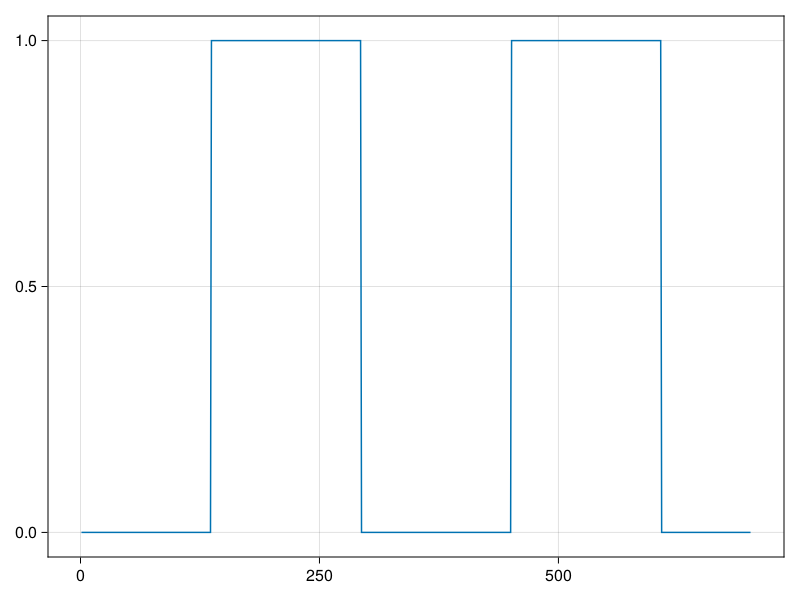

In [8]:
lines(round.(Int,cos.(hans).^2))

The second version has the disadvantage, that intermediate variables have to be created that are passed on to the next operation. 

In [9]:
hans1 = cos.(hans)
hans2  = hans1.^2
hans3 = round.(Int,hans2)
lines(hans3)
a


UndefVarError: UndefVarError: `a` not defined

The `@chain` version solves both problems, as no intermediate variables have to be created and the order of execution goes from top to bottom, which makes it very readable. Two key feature of `@chain` stand out, if the variable thats passed through is the first argument of a function you can just omit it. And if its not the first argument of a function, you can replace it with an underscore `_`. 

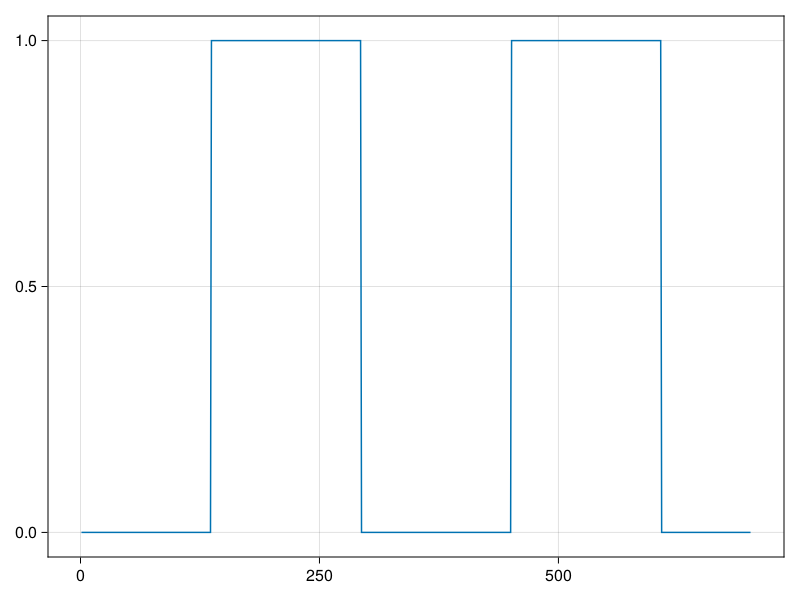

In [10]:
@chain hans begin
    cos.()
    _.^2
    round.(Int,_)
    lines()
end

Note: `Macros` are a special and very powerful part of the metaprogramming capabilities of Julia. You have already used metaprogramming in the import export notebook, where strings have been evaluated as Julia sourcecode. Macros take this concept one step futher and generate and execute source code during runtime. In the example above the `@chain` macro in the third case takes the three operations/functions as input and then generates and runs the code as shown in the first nested case. 

This makes macros very powerful as they can generate and instantly execute basically anything, from single functions, complex nested functions, data structures, whole sub-programs, ... . If not mentioned otherwise all of the macros you will see in this course can be used in a similar way as functions. However, if you use different macros in your own coding, you should always make sure you know what they are doing.   


#### 2.1 Detect dates 

Not all data types are detected correctly in this data set. The `Datum` column has been interpreted as a `String`, but should be interpreted as a `Date` object from the `Dates` package. 
To do this, you first have to replace the delimiter `/` with `-` and then call the `Date()` function on the `String`. It is possible to do this step by step or in one step with two nested functions.

In [11]:
#cast datum to date
data.Datum = @chain data.Datum begin
    # as columns of DataFrames are arrays, you need to use the broadcasted `.` version of function which normally only works on scalar types
    replace.("/" => "-") 
    Date.()
end
data

Row,Zeit,Temperatur_Min,Temperatur_Max,Temperatur,Luftfeuchtigkeit,Niederschlag,Niederschlagsart,Bedeckung,Sonnenscheindauer,Datum,Kategorie
,String31,Float64,Float64,Float64,Float64,Float64,String7?,Float64,Int64,Date,String31
1,1947-12-31T23:00Z,-2.6,2.9,0.27,88.91,0.0,missing,NaN,0,1948-01-01,Overcast
2,1948-01-01T23:00Z,2.8,10.0,6.46,91.46,0.0,missing,NaN,0,1948-01-02,Overcast
3,1948-01-02T23:00Z,10.7,12.4,11.7,89.08,0.0,missing,NaN,0,1948-01-03,Overcast
4,1948-01-03T23:00Z,5.5,11.7,9.81,78.96,0.0,missing,NaN,0,1948-01-04,Overcast
5,1948-01-04T23:00Z,4.7,11.8,7.88,80.33,0.0,missing,NaN,0,1948-01-05,Overcast
6,1948-01-05T23:00Z,1.6,5.4,3.23,76.08,0.0,missing,NaN,0,1948-01-06,Overcast
7,1948-01-06T23:00Z,1.8,10.4,6.75,90.33,0.0,missing,NaN,0,1948-01-07,Overcast
8,1948-01-07T23:00Z,3.5,9.6,5.76,73.0,0.0,missing,NaN,0,1948-01-08,Overcast
9,1948-01-08T23:00Z,1.9,5.6,3.43,73.75,0.0,missing,NaN,0,1948-01-09,Overcast


### 3. Cleaning and structuring data

In order to make your life easier and to stay consistent with the used language, let's rename the columns to shorter English terms. The function `rename!` toegther with the `@chain` macro can be used for this purpose as well. Column names are `Symbols` in Julia, these are special types of `Strings` that don't allow mutations and start with an `:`. 

In [3]:
@chain data begin
    rename!(:Temperatur_Min => :temp_min,:Temperatur_Max => :temp_max ,:Luftfeuchtigkeit => :humidity, :Niederschlag => :rain, :Niederschlagsart =>:preci_type)
    rename!(:Temperatur => :temp,:Bedeckung => :cover, :Sonnenscheindauer => :sun, :Datum => :date, :Kategorie => :weather)
end


UndefVarError: UndefVarError: `data` not defined

Let's add columns for year, month ,day and a combines colum for days and month. This can be done using the function `year(), month(), day() and monthday()` on the `Date` column and the `@transform` macro from `DataFramesMeta`. The `@transform` macro creates a new DataFrame which contains the old DataFrame together with newly defined columns. The new columns are often calculated by applying some functions on already existing colums. If you are applying a function to each element of a column you need to use the broadcasted (`.`) version of the function. 

In [4]:
#add columns for year, month, day and day of month
data = @chain data begin 
    @transform(:year = year.(:date))
    @transform(:month = month.(:date))
    @transform(:day = day.(:date))
    @transform(:monthday = monthday.(:date))
end
data

UndefVarError: UndefVarError: `data` not defined

In order to make the following data analysis easier, let's cut out all the 29th of February and the incomplete year 2022, so that every year is 365 days long (shame on the authors for not finding a better workaround;). The `@subset` macro  from the `DataFramesMeta` package can be used here. It creates a subset of the input data which fullfils a given condition. 

In [5]:
data.monthday = string.(data.monthday)
# cut february the 29th in every year and the year 2022 altogether to make data analysis easier 
data = @subset(data,:monthday .!= "(2, 29)",:year .!= 2022)

UndefVarError: UndefVarError: `data` not defined

### 4. Plotting

Now we can plot the average Temperatur on each day in Würzburg since 1948 using `CairoMakie`. Each column of a `DataFrame` is a vector which can be accessed with the syntax `DataFrame.column_name` and directly used as x and y input for plotting. 

In [6]:
#set a nice looking theme
set_theme!(theme_ggplot2())
f1 = Figure()
#custom axis where a datapoint every 10 years is mapped to its corresponding year. For a refresh on 
#custom axis in CairoMakie revisit the chapter on Plotting. 
ax1_1 = Axis(f1[1, 1],xticks = (1:10*365:nrow(data), string.(data.year)[1:10*365:nrow(data)] ))
line1 = lines!(ax1_1,data.temp)
f1

UndefVarError: UndefVarError: `data` not defined

Or the humidity on each day. 

In [7]:
f2 = Figure()
ax2_1 = Axis(f2[1, 1],xticks = (1:10*365:nrow(data), string.(data.year)[1:10*365:nrow(data)] ))
line2 = lines!(ax2_1,data.humidity)
f2

UndefVarError: UndefVarError: `data` not defined

Plots with 27010 oscillating datapoints are not very useful. Therefore, some manipulations on the data have to be performed to extract interesting features. 
For example, what is the average over all datapoints? For this purpose, the `@combine` macro from the `DataFramesMeta` package together with the `mean` function from the `Statistics` package can be used to  create a new DataFrame only containing that information.

In [8]:
data_sum = @combine(data,:avg_temp = mean(:temp),:avg_temp_max = mean(:temp_max),:avg_temp_min = mean(:temp_min),:avg_humi = mean(:humidity))

UndefVarError: UndefVarError: `data` not defined

Now you know the average temperature over all years, but wouldn't it also be interesting to know the average temperature per year ? For this case, you can use the `groupby(DataFrame,:columnname )` function which creates a `GroupedDataFrame`. You can think of a `GroupedDataFrame` as an ordered dictionary of `sub-DataFrames`.  All `sub-DataFrames` in one group share the same value in the specified column name.

In [9]:
g_data_year = groupby(data,:year) 

UndefVarError: UndefVarError: `data` not defined

In this case a `GroupedDataFrame` with 74 groups is returned, one for each year between 1948 and 2021.

The `@combine` macro can be used on this `GroupedDataFrame` as well and creates a new DataFrame with 74 rows, one for each group/year. The `mean` function from the `Statistics` package calculates the mean of the given values. 

In [10]:
temp_per_year = @combine(g_data_year,:avg_temp = mean(:temp),:avg_temp_max = mean(:temp_max),:avg_temp_min = mean(:temp_min),:avg_humi = mean(:humidity))

UndefVarError: UndefVarError: `g_data_year` not defined

Let's plot this together with the average temp over all years. 

In [11]:
f3 = Figure(resolution = ( 1500,500))
ax3_1 = Axis(f3[1, 1],title = "Average Temperatur") 
line3_1_1 = lines!(ax3_1, temp_per_year.year,temp_per_year.avg_temp)
line3_1_2 = hlines!(ax3_1, data_sum.avg_temp,color = "red", linestyle = :dot)

ax3_2 = Axis(f3[1, 2],title = "Average Temperatur Max") 
line3_2_1 = lines!(ax3_2, temp_per_year.year,temp_per_year.avg_temp_max)
line3_2_2 = hlines!(ax3_2, data_sum.avg_temp_max,color = "red",linestyle = :dot)

ax3_3 = Axis(f3[1, 3],title = "Average Temperatur Min") 
line3_3_1 = lines!(ax3_3, temp_per_year.year,temp_per_year.avg_temp_min)
line3_3_2 = hlines!(ax3_3, data_sum.avg_temp_min,color = "red",linestyle = :dot)

f3

UndefVarError: UndefVarError: `temp_per_year` not defined

Well, climate change is happening in Würzburg as well. 

In [12]:
f4 = Figure(resolution = (500,500))
ax4_1 = Axis(f4[1, 1],title = "Average Humidity") 
line4_1_1 = lines!(ax4_1, temp_per_year.year,temp_per_year.avg_humi)
line4_1_2 = hlines!(ax4_1, data_sum.avg_humi,color = "red",linestyle = :dot)
f4

UndefVarError: UndefVarError: `temp_per_year` not defined

The same plot for the humidity does not give a clear picture of a change over the years. But maybe the authors are just not educated enough on climate science to interpret this data accordingly. 

Note: This way of doing data analysis is called the ["Split-Apply-Combine Strategy"](https://www.jstatsoft.org/article/view/v040i01) and is based on a paper of Hadely Wickham.

Another way of grouping the data would be by month: 

In [13]:
temp_per_month =  @chain data begin
    groupby(:month) 
    @combine(:avg_temp = mean(:temp),:avg_temp_max = mean(:temp_max),:avg_temp_min = mean(:temp_min),:avg_humi = mean(:humidity))
end

UndefVarError: UndefVarError: `data` not defined

This gives a DataFrame with 12 columns - One for each month. Now you can plot the average humidity per month. 

In [14]:
#small trick : 
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dez"]
# can be written faster as : 
months = split("Jan Feb Mar Apr May Jun Jul Aug Sep Okt Nov Dez")

12-element Vector{SubString{String}}:
 "Jan"
 "Feb"
 "Mar"
 "Apr"
 "May"
 "Jun"
 "Jul"
 "Aug"
 "Sep"
 "Okt"
 "Nov"
 "Dez"

In [15]:
f5 = Figure(resolution = (500,500))
ax5_1 = Axis(f5[1, 1],title = "Average Humidity over the year" ,xticks = (1:12, months))
line5_1_1 = lines!(ax5_1, temp_per_month.month,temp_per_month.avg_humi)
line5_1_2 = hlines!(ax5_1, data_sum.avg_humi,color = "red", linestyle = :dot)
f5

UndefVarError: UndefVarError: `temp_per_month` not defined

The humidity is higher in the winter than in the summer. With the help of some [googling](https://en.wikipedia.org/wiki/Humidity) this can be interpreted in the following way: There are two values for humidtiy: relative and absolute humidity. The absolute humidity is the amount of water vapor in the air. The maximum amount of storable water vapor in the air is temperature dependent and lower for lower temperatures. Assuming constant absolute humidity over a year, then the relative humiditiy (which was measured here) should be lower in the summer and higher in the winter, which is exactly what we see in our data.  

Let's make the same plot for the temperature values:

In [16]:
f6 = Figure(resolution = ( 1500,500))
ax6_1 = Axis(f6[1, 1],title = "Average Temperature",xticks = (1:12, months )) 
line6_1_1 = lines!(ax6_1, temp_per_month.month,temp_per_month.avg_temp)
line6_1_2 = hlines!(ax6_1, data_sum.avg_temp,color = "red",linestyle = :dot)

ax6_2 = Axis(f6[1, 2],title = "Average Temperature Max",xticks = (1:12, months )) 
line6_2_1 = lines!(ax6_2, temp_per_month.month,temp_per_month.avg_temp_max)
line6_2_2 = hlines!(ax6_2, data_sum.avg_temp_max,color = "red",linestyle = :dot)

ax6_3 = Axis(f6[1, 3],title = "Average Temperature Min",xticks = (1:12, months )) 
line6_3_1 = lines!(ax6_3, temp_per_month.month,temp_per_month.avg_temp_min)
line6_3_2 = hlines!(ax6_3, data_sum.avg_temp_min,color = "red",linestyle = :dot)

f6

UndefVarError: UndefVarError: `temp_per_month` not defined

This looks very familiar, as it is the temperature part of a climate diagramm. A similar diagram (with probably the same underlying data) can be found on the german [wikipedia page](https://de.wikipedia.org/wiki/W%C3%BCrzburg#Klima) of Würzburg. 

### 5. Sorting data

Now, it is possible to compare the weather between different years. The most interesting ones are of course the most extreme ones. 

The `sort` function can be used to sort the data in ascending or descending order with regard to one column.    

In [17]:
# hottest first
sort(temp_per_year,:avg_temp,rev = true)

UndefVarError: UndefVarError: `temp_per_year` not defined

In [18]:
# coldest first
sort(temp_per_year,:avg_temp,rev = false)

UndefVarError: UndefVarError: `temp_per_year` not defined

The hottest year has been 2018 and the coldest 1956. Let's create DataFrames with the average values per month for specific years. The `@chain` macro can be used here, too. One year can then be plotted together with the average over all years.  

In [19]:
example_year = 2018
temp_per_month_example =  @chain data begin
    @subset(:year .== example_year)
    groupby(:month) 
    @combine(:avg_temp = mean(:temp),:avg_temp_max = mean(:temp_max),:avg_temp_min = mean(:temp_min),:avg_humi = mean(:humidity))
end

f7 = Figure(resolution = ( 1500,500))
ax7_1 = Axis(f7[1, 1],title = "Average Temperatur",xticks = (1:12, months )) 
line7_1_1 = lines!(ax7_1, temp_per_month.month,temp_per_month.avg_temp, label = "Mean 48-21")
line7_1_2 = lines!(ax7_1, temp_per_month_example.month,temp_per_month_example.avg_temp,label = "$(example_year)")
axislegend(ax7_1)

ax7_2 = Axis(f7[1, 2],title = "Average Temperatur Max",xticks = (1:12, months )) 
line7_2_1 = lines!(ax7_2, temp_per_month.month,temp_per_month.avg_temp_max,label = "Mean 48-21")
line7_2_2 = lines!(ax7_2, temp_per_month_example.month,temp_per_month_example.avg_temp_max,label = "$(example_year)")
axislegend(ax7_2)

ax7_3 = Axis(f7[1, 3],title = "Average Temperatur Min",xticks = (1:12, months )) 
line7_3_1 = lines!(ax7_3, temp_per_month.month,temp_per_month.avg_temp_min,label = "Mean 48-21")
line7_3_2 = lines!(ax7_3, temp_per_month_example.month,temp_per_month_example.avg_temp_min,label = "$(example_year)")
axislegend(ax7_3)
f7

UndefVarError: UndefVarError: `data` not defined

It is possible to average over days instead of months: 

In [20]:
temp_per_day = @chain data begin 
    groupby(:monthday)
    @combine(:avg_temp = mean(:temp),:avg_temp_max = mean(:temp_max),:avg_temp_min = mean(:temp_min),:avg_humi = mean(:humidity))
end

f17 = Figure(resolution = ( 1000,500))
ax17_1 = Axis(f17[1, 1],title = "Average Temperatur",xticks = (15:31:365, months  )) 
line17_1_1 = lines!(ax17_1, temp_per_day.avg_temp, label = "Average_temp")
line17_1_2 = lines!(ax17_1, temp_per_day.avg_temp_max, label = "Average_temp_max")
line17_1_2 = lines!(ax17_1, temp_per_day.avg_temp_min, label = "Average_temp_min")
axislegend(ax17_1)
f17

UndefVarError: UndefVarError: `data` not defined

This result is similar to the monthly average, but surprisingly "unsmooth". Apparently the average of 74 days for each date is a sample size too small and/or the weather has strong inherent noise.  

Another fun question to ask would be: What has been the hottest and coldest day on average ?  

In [21]:
extreme_days_average = sort(temp_per_day,:avg_temp_min, rev = false)

f10 = Figure(resolution = (1500,500))
ax10_1 = Axis(f10[1,1], xticks = (1:12,string.(extreme_days_average.monthday[1:12])), title = " Average Temp per day ", titlesize = 20, xlabel = "Day of the Year", ylabel = "Temp", xlabelsize = 15, ylabelsize = 15)
bar10_1 = barplot!(ax10_1, extreme_days_average.:avg_temp_min[1:12],color = :blue )


extreme_days_average = sort(temp_per_day,:avg_temp_max, rev = true)

ax10_2 = Axis(f10[2,1], xticks = (1:12,string.(extreme_days_average.monthday[1:12])), title = " Average Temp per day ", titlesize = 20, xlabel = "Day of the Year", ylabel = "Temp", xlabelsize = 15, ylabelsize = 15)
bar10_2 = barplot!(ax10_2, extreme_days_average.:avg_temp_max[1:12],color = :orange )
f10 

UndefVarError: UndefVarError: `temp_per_day` not defined

The on average coldest and warmest days do not all line up next to each other. In the case of the coldest days, there are two periods, one in the middle of January and one in the middle of February, that have historically been very cold. Whereas the warmest days are grouped together at the end of July and the beginning of August. 

But enough about averages, let's find the hottest and coldest days ever recorded in Würzburg. The `sort` function can be used for this purpose, too. But this time on the whole data set.  

In [22]:
extreme_days = sort(data,:temp_min, rev = false)
f8 = Figure(resolution = (1500,500))
ax8_1 = Axis(f8[1,1], xticks = (1:12,string.(extreme_days.date[1:12])), title = " Temp per day ", titlesize = 20, xlabel = "Date", ylabel = "Temp", xlabelsize = 15, ylabelsize = 15)
bar8_1 = barplot!(ax8_1, extreme_days.temp_min[1:12],color = :darkblue )

f8

UndefVarError: UndefVarError: `data` not defined

In [23]:
extreme_days = sort(data,:temp_max, rev = true)
f9 = Figure(resolution = (1500,500))
ax9_1 = Axis(f9[1,1], xticks = (1:12,string.(extreme_days.date[1:12])), title = " Temp per day ", titlesize = 20, xlabel = "Date", ylabel = "Temp", xlabelsize = 15, ylabelsize = 15)
bar9_1 = barplot!(ax9_1, extreme_days.:temp_max[1:12], color = :red )

f9

UndefVarError: UndefVarError: `data` not defined

Apart from the year 1952, which had a crazy hot July, 9 of the 12 hottest days are less than 20 years ago. And 11 of the 12 coldest days are more than 37 years ago. This is a further indicator for the ongoing climate change. 

### 6. Transforming Data

So far, you have only calculated averages of already existing parameters and/or sorted the data. A big part of data analysis is to come up with new metrics to further quantify the underlying data. For example, let's find the days with the biggest temperature difference. The `@transfom` macro can be used to add new columns to a DataFrame. The content of these new columns can depend on the existing columns, but can also be independent of them.   



In [24]:
data_delta =  @chain data begin 
    @transform(:delta_t = :temp_max - :temp_min)
    sort!( :delta_t, rev = true)
end

f10 = Figure(resolution = (1500,500))
ax10_1 = Axis(f10[1,1], xticks = (1:12,string.(data_delta.date[1:12])), title = " Delta Temp per day ", titlesize = 
    20, xlabel = "Date", ylabel = "Temp", xlabelsize = 15, ylabelsize = 15)
bar10_1 = crossbar!(ax10_1,[1:12;], data_delta.:delta_t[1:12],data_delta.:temp_min[1:12],data_delta.:temp_max[1:12], label = "Temperature Range",
    color =:green)
axislegend(ax10_1, position = :rb)
f10

UndefVarError: UndefVarError: `data` not defined

A cross bar plot is a possible way to display this kind of data. Whereas the black lines indicate the absolute temperature difference, the beginning and the end of the blocks indicates the values of minimum and maximum temperature on this day. Surprisingly, days with big temperature differences can happen in every season. 

### 7.Using subset of data

Unfortunately, not all measured values go back to 1948. For example, daily minutes of sunshine have only been measured since 1951. To make an analysis on this parameter, the data must be filtered first. The `@subset` macro can be used for that purpose as well. 

In [25]:
sunhine_per_month = @chain data begin
    @subset(:year .>= 1951)
    groupby(:month)
    @combine(:sunhours = mean(:sun)/60)
end


f11 = Figure(resolution = (1500,500))
ax11_1 = Axis(f11[1,1], xticks = (1:12,months), title = " Average daily sunshine hours ", titlesize = 20, xlabel = "Month", ylabel = "Hours")
bar11_1 = barplot!(ax11_1, sunhine_per_month.sunhours,color =:gold2 )

f11


UndefVarError: UndefVarError: `data` not defined

Precipitation has only been measured since 1996 (why?). It can be analysed the same way as the sunshine hours and added to the plot. 

In [26]:
rain_per_month = @chain data begin
    @subset(:year .>= 1996)
    groupby(:month)
    @combine(:rain = mean(:rain))
end


f12 = Figure(resolution = (1500,500))
ax12_1 = Axis(f12[1,1], xticks = (1:12,months), title = " Average daily sunshine hours & rain", titlesize = 20, xlabel = "Month", ylabel = "Hours")
ax12_2 = Axis(f12[1,1], ylabel = "precipitation[mm] ",yticklabelcolor = :blue, yaxisposition = :right,xgridvisible = false,
        ygridvisible = false)

hidespines!(ax12_2)
hidexdecorations!(ax12_2,minorgrid = true)
ylims!(ax12_2, 0, 3)
ylims!(ax12_1, 0, 9)
bar12_1 = barplot!(ax12_1, sunhine_per_month.sunhours,color =color =:gold2, label = "Sunshine" )
line12_2 = lines!(ax12_2, rain_per_month.rain,color ="blue" ,label = "rain", linewidth = 5)

Legend( f12[1,2], [bar12_1,line12_2],["Sunshine","Rain"])

f12


UndefVarError: UndefVarError: `data` not defined

It is also possible to group a DataFrame by more than one shared column value. In this case the `groupby()` function expects a vector of columnnames. 
This way, it is easy to calculate the average sunshine hours in every month in the last 10 years.

In [27]:
sunshine_10_years = @chain data begin
    @subset(:year .> 2010)
    groupby([:year, :month])
    @combine(:mean_sun_year = mean(:sun)/60)
end


UndefVarError: UndefVarError: `data` not defined

This DataFrame can be grouped by years. It is possible to iterate over this grouped DataFrame with a loop or to access single years via their index or their key. We can now create a figure similar to f11 but add also single or multiple individual years with a loop.

In [28]:
sunshine_per_year = groupby(sunshine_10_years, :year)

UndefVarError: UndefVarError: `sunshine_10_years` not defined

With this data, single years can be added to the plot for average sunshine hours. 

In [29]:
f13 = Figure(resolution = (1500,500))
ax13_1 = Axis(f13[1,1], xticks = (1:12,months), title = " Average daily sunshine hours ", titlesize = 20, xlabel = "Month", ylabel = "Hours")
bar13_1 = barplot!(ax13_1, sunhine_per_month.sunhours,color = :gold2, label = "Average" )

# choose years by changing iterator/index 
for i in 10:1:length(sunshine_per_year)
    lines!(ax13_1, sunshine_per_year[i].mean_sun_year, label = "$(sunshine_per_year[i].year[1])" , linewidth = 5)  
end
## access per key 
lines!(ax13_1, sunshine_per_year[(:2014,)].mean_sun_year, label = "$(sunshine_per_year[(:2014,)].year[1])",linewidth = 5 )  


Legend( f13[1,2],ax13_1, "Sunshine per months")
f13


UndefVarError: UndefVarError: `sunhine_per_month` not defined

And it appears climate change has also some positive aspects, as the average daily sunshine hours of the last years have typically been higher than the average in the last 70 years. 

## Exercises

All exercises in this course are divided into three different difficulty categories: <span style="color:green">easy</span>, <span style="color:orange">medium</span> and <span style="color:red">hard</span>. <span style="color:green">Easy</span> exercises should be solvable solely with the contents of the respective notebook. <span style="color:orange">Medium</span> often require the transfer of known concepts to new problems. Therefore, it might be necessary to look up some old notebooks or to use your creativity and curiosity to combine seemingly unrelated stuff. <span style="color:red">Hard</span> exercises take this concept one step further and might require you to use additional resources like the official documentation, google, StackOverflow,... . 


### <p style='color: green'>easy</p>


1. Create a DataFrame named `millenium` only containing the values since 2000

2. Filter the `millenium` so that it only contains your birthdays. 
    - in which year did you have the best/worst weather to celebrate (in Würzburg ;) ) ? 


3. Find out how many times since 2000 has been a "white christmas" in Würzburg (snowfall on christmas eve or the day before and temperatures below 0).
 

### <p style='color: orange'>medium</p>

4. Write a function that checks if a year is a leapyear and returns a bool. 


5. Calculate the average temperatur per month for all years before 1973, from 1974-1999 and from 2000 onwards. Plot them into one graph. Compare these values with the values from figure `f6`. What trend can you observe? 

### <p style='color: red'>hard</p>

6. Find out what the column "Bedeckung"/"cover/cloudcover" means. Plot its monthly and yearly average since the year it has been measured. Interpret the data to your best ability. 
    Hint: There are some NaN values in the data set (even after cover has first been measured). Use the function `isnan()` to find the NaN values and remove them from the data. 

7. Calculate the standard deviation of the yearly temperatures (column temp). Is there a significant difference between years? If so, how can this be interpreted?  

8. Split the original data set (before the filter of the 29th of february) in two data sets using your function defined in exercise 4. One data set should only contain leap years and the other one should only contain normal years.  

9. Compare the average temperatures per month and per year between the leap and normal years. Is there a difference? 
